In [1]:
#Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Dataa Cleanup
df['data_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\17179\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Fri Jun 13 11:28:52 2025).


In [2]:
# Only get DA jobs
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values form the column plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

393362    110240.109375
437188     73500.000000
539872     51800.000000
541957     52500.000000
461971     65000.000000
193497    115000.000000
71316     111175.000000
751048    100000.000000
118439     60000.000000
281134    167000.000000
Name: salary_year_avg, dtype: float64

<Axes: >

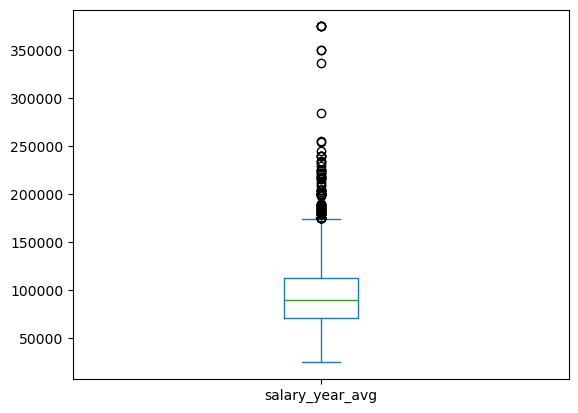

In [3]:
df_DA_US['salary_year_avg'].plot(kind='box')

{'whiskers': [<matplotlib.lines.Line2D at 0x2154a280e30>,
 'caps': [<matplotlib.lines.Line2D at 0x2154a281400>,
 'boxes': [<matplotlib.lines.Line2D at 0x2154a280b90>],
 'medians': [<matplotlib.lines.Line2D at 0x2154a2819a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2154a281c40>],
 'means': []}

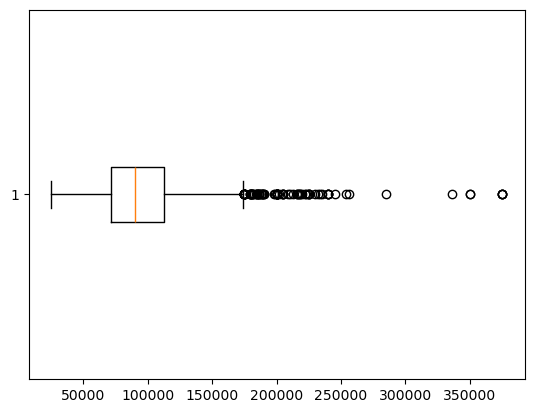

In [7]:
plt.boxplot(df_DA_US['salary_year_avg'], vert=False)

C:\Users\17179\AppData\Local\Temp\ipykernel_31948\1875889994.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


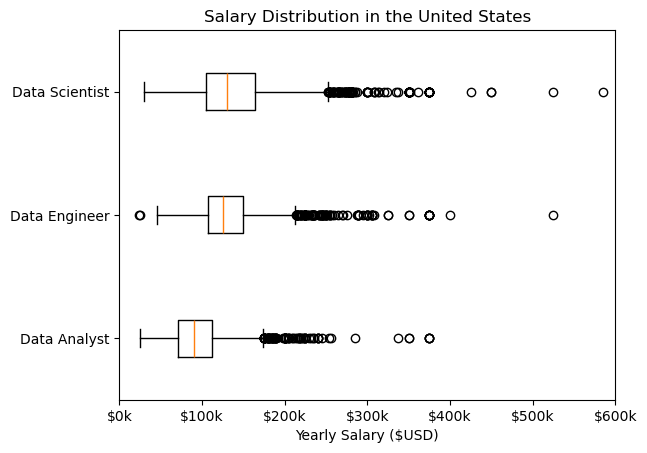

In [17]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# Only get DA jobs
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.xlim(0, 600000)
plt.show()